In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn import tree

## Display Training & Test data (top & bottom five datasets)

In [3]:
#load the csv file
train_data = pd.read_csv('train_data_preprocessed_v3.csv')
test_data = pd.read_csv('test_data_preprocessed_v3.csv')

In [4]:
train_data.shape

(63874, 55)

In [5]:
test_data.shape

(9043, 55)

In [6]:
train_data.head()

,day,age,age_class_0,age_class_1,age_class_2,age_class_3,default_no,default_yes,month_apr,month_aug,...,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log,c1,c2,c3,y
0,29,42,0,0,1,0,1,0,0,0,...,0,-0.710220,0.556372,-1.832544,5.809419,-0.531878,0.087504,1.789912,-1.279360,1
1,15,50,0,0,1,0,1,0,0,0,...,0,-0.605846,0.556372,0.243524,-0.011872,-0.531878,0.840223,-0.015243,-0.665628,1
2,5,47,0,0,1,0,1,0,0,0,...,0,-0.440095,0.556372,-1.201884,3.516911,-0.531878,0.574884,-1.294733,-1.277750,1
3,16,39,0,1,0,0,1,0,0,0,...,0,-0.154512,0.556372,-1.240974,-0.724921,-0.531878,-0.177147,0.095431,-0.473078,1
4,30,30,1,0,0,0,1,0,1,0,...,0,-0.463407,0.556372,-0.033302,-0.011872,-0.531878,-1.022643,1.883206,-0.257505,0


In [7]:
test_data.head()

,day,age,age_class_0,age_class_1,age_class_2,age_class_3,default_no,default_yes,month_apr,month_aug,...,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log,c1,c2,c3,y
0,14,48,0,0,1,0,1,0,0,0,...,0,-0.353943,0.46161,0.033731,-0.811596,-0.435061,0.669934,-0.213638,-0.403107,1
1,22,31,0,1,0,0,1,0,0,1,...,0,3.367438,0.46161,-0.425208,-0.170094,-0.435061,-0.939981,0.705061,-0.159961,1
2,9,45,0,0,1,0,1,0,0,0,...,0,-0.112356,0.46161,-0.002151,-0.811596,-0.435061,0.399123,-0.819273,-0.508545,1
3,20,58,0,0,0,1,1,0,0,0,...,0,0.064959,0.46161,-1.512344,0.322148,-0.435061,1.600722,0.529756,-0.483361,1
4,21,35,0,1,0,0,1,0,0,0,...,0,1.839344,0.46161,2.413680,-0.170094,-0.435061,-0.565282,0.593416,-0.191371,0


In [8]:
# Creating X,Y test and train data
x_train = train_data[train_data.columns[:-1]]
y_train = train_data[train_data.columns[-1]]
x_test = test_data[test_data.columns[:-1]]
y_test = test_data[test_data.columns[-1]]

### Creating individual base classifiers

In [9]:
random_forest = RandomForestClassifier(n_estimators=25, random_state=1)
naive_bayes = GaussianNB()
LR = LogisticRegression(C = 0.1, max_iter = 200, penalty = 'l1', solver = 'liblinear')
NN = MLPClassifier(max_iter=1000, random_state=42)

## Hard voting classifier

### Hyperparameter tuning is done by tuning the parameters of individual models which have already been done in other ipynb files, so here another type of tuning is model selection. I have listed two combination of base models to fit into the hard voting mechanism to see the performance

### Model Performance - Combination 1

In [10]:
# Soft voting classifier
ensemble_classifier = VotingClassifier(estimators=[
    ('Neural_Network', NN),
    ('logistic_regression', LR),
    ('naive_bayes',naive_bayes )
], voting='hard')

In [11]:
ensemble_classifier = ensemble_classifier.fit(x_train, y_train)

In [12]:
for clf, label in zip([NN, LR, naive_bayes, ensemble_classifier], 
                      ['Neural_Network', 'logistic_regression', 'naive_bayes', 'ensemble_classifier']):
    scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
    print("Training accuracy: %0.3f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(),label))
y_pred = ensemble_classifier.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Testing accuracy: %0.3f [Ensemble Classifier]'% accuracy)

Training accuracy: 0.923 (+/- 0.1246) [Neural_Network]
Training accuracy: 0.931 (+/- 0.1244) [logistic_regression]
Training accuracy: 0.894 (+/- 0.1128) [naive_bayes]
Training accuracy: 0.929 (+/- 0.1281) [ensemble_classifier]
Testing accuracy: 0.892 [Ensemble Classifier]


Testing Accuracy: 0.8922923808470641
Confusion Matrix:
 [[ 581  477]
 [ 497 7488]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.55      0.54      1058
           1       0.94      0.94      0.94      7985

    accuracy                           0.89      9043
   macro avg       0.74      0.74      0.74      9043
weighted avg       0.89      0.89      0.89      9043



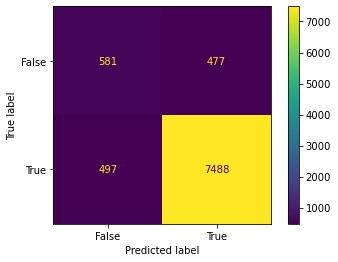

In [13]:
accuracy = accuracy_score(y_test, y_pred)
confusion = metrics.confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Testing Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])
cm_display.plot()
plt.show()

### Model Performance - Combination 2

In [20]:
# Soft voting classifier
ensemble_classifier = VotingClassifier(estimators=[
    ('random_forest', random_forest),
    ('Logistic_Regression', LR),
    ('naive_bayes',naive_bayes )
], voting='hard')
ensemble_classifier = ensemble_classifier.fit(x_train, y_train)

In [21]:
for clf, label in zip([random_forest, LR, naive_bayes, ensemble_classifier], 
                      ['random_forest', 'Logistic Regression', 'naive_bayes', 'ensemble_classifier']):
    scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
    print("Training accuracy: %0.3f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(),label))
y_pred = ensemble_classifier.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Testing accuracy: %0.3f [Ensemble Classifier]'% accuracy)

Training accuracy: 0.934 (+/- 0.1091) [random_forest]
Training accuracy: 0.931 (+/- 0.1244) [Logistic Regression]
Training accuracy: 0.894 (+/- 0.1128) [naive_bayes]
Training accuracy: 0.933 (+/- 0.1230) [ensemble_classifier]
Testing accuracy: 0.896 [Ensemble Classifier]


Testing Accuracy: 0.8959416122968041
Confusion Matrix:
 [[ 520  538]
 [ 403 7582]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.49      0.52      1058
           1       0.93      0.95      0.94      7985

    accuracy                           0.90      9043
   macro avg       0.75      0.72      0.73      9043
weighted avg       0.89      0.90      0.89      9043



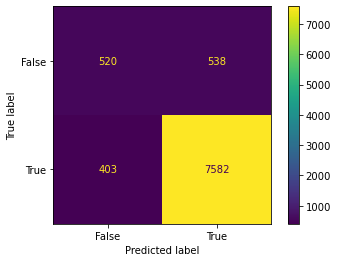

In [22]:
accuracy = accuracy_score(y_test, y_pred)
confusion = metrics.confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Testing Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])
cm_display.plot()
plt.show()

### Feature Importance Assessment
#### Similar result obtained for random forest assessment since logistic regression and naive bayes are not applicable for feature importance assessment